# PyTorch Tests

In [141]:
from _imports import *
from utils import Euler2fixedpt
from ssn_2dtopoV1 import SSN2DTopoV1, _SSN_Base
from params import GridParameters

In [142]:
grid_pars = GridParameters(
    gridsize_Nx=17,  # Number of grid points in one dimension
    gridsize_deg=3.2,  # Size of the grid in degrees of visual angle
    magnif_factor=2,  # Magnification factor to convert degrees to mm
    hyper_col=800,  # Hypercolumn
)

psi = torch.tensor(0.774)
# Define connection parameters for PyTorch
conn_pars = {
    'J_2x2': torch.tensor([[1.124, -0.931], [1.049, -0.537]],dtype=torch.float64) *torch.pi * psi, 
    's_2x2': torch.tensor([[0.2955, 0.09], [0.5542, 0.09]]),  
    'p_local': [0.72,0.7],  
    'sigma_oris': 45,  
}

# Define other parameters
n = 2  
k = 0.04
tauE = 20 # Time constant for excitatory neurons
tauI = 10  # Time constant for inhibitory neurons

In [143]:
ssn_2d_topo = SSN2DTopoV1(n=n, k=k, tauE=tauE, tauI=tauI, grid_pars=grid_pars, conn_pars=conn_pars)


ORI_vec:  tensor([33.1914, 33.0290, 32.8675, 32.7071, 32.5476, 32.3891, 32.2315, 32.0748,
        31.9191, 31.7643, 31.6105, 31.4575, 31.3054, 31.1541, 31.0038, 30.8543,
        30.7056, 33.1166, 32.9546, 32.7936, 32.6335, 32.4744, 32.3163, 32.1591,
        32.0028, 31.8475, 31.6930, 31.5395, 31.3868, 31.2351, 31.0842, 30.9342,
        30.7850, 30.6366, 33.0415, 32.8799, 32.7192, 32.5596, 32.4009, 32.2431,
        32.0863, 31.9304, 31.7754, 31.6214, 31.4682, 31.3159, 31.1645, 31.0139,
        30.8642, 30.7154, 30.5674, 32.9660, 32.8048, 32.6446, 32.4853, 32.3270,
        32.1697, 32.0132, 31.8577, 31.7031, 31.5494, 31.3966, 31.2447, 31.0936,
        30.9434, 30.7940, 30.6455, 30.4978, 32.8902, 32.7294, 32.5696, 32.4108,
        32.2529, 32.0959, 31.9399, 31.7847, 31.6305, 31.4772, 31.3247, 31.1731,
        31.0224, 30.8726, 30.7235, 30.5753, 30.4279, 32.8140, 32.6537, 32.4943,
        32.3359, 32.1784, 32.0218, 31.8662, 31.7115, 31.5576, 31.4047, 31.2526,
        31.1013, 30.9510, 30.8

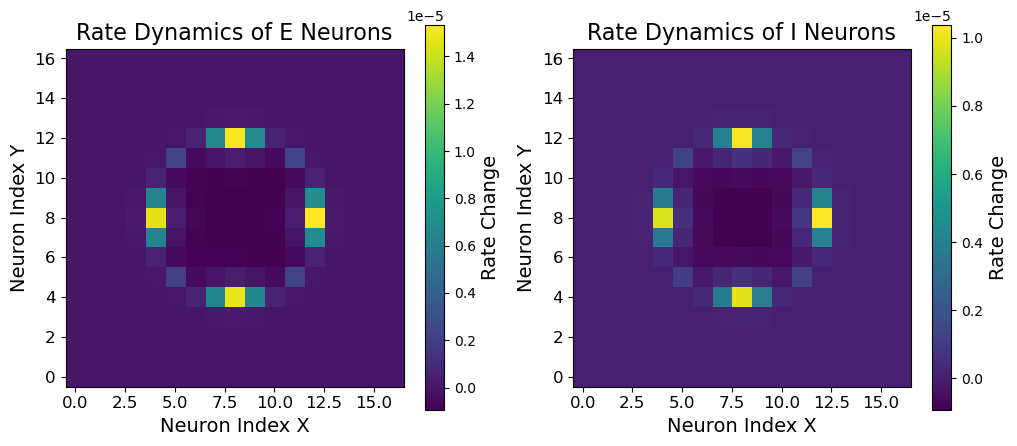

In [148]:
torch.set_default_dtype(torch.float64)

# Creating a simple stimulus for the simulation
contrast = 50
radius = 0.75
orientation = 0

input_pars = {
    'gE': 0.481,
    'gI': 0.226,
    'sig_ori_EF': 32,
    'sig_ori_IF': 32,
    'sigma_RF': 0.04
}

# Grating stimulus
inp_vec_grating = ssn_2d_topo.make_grating_input(radius, ori_s=orientation, contrast=contrast,**input_pars)

# Find the network's fixed point response to the grating stimulus
r_fp_grating, CONVG_grating = ssn_2d_topo.fixed_point_r(inp_vec_grating,verbose=False)

# Rate dynamics
r_dyn = ssn_2d_topo.drdt(r_fp_grating, inp_vec_grating)

E_map, I_map = ssn_2d_topo.vec2map(r_dyn)

# Plot for E neurons
plt.figure(figsize=(12, 5))


plt.subplot(1,2,1)
plt.imshow(E_map.cpu().detach().numpy(), cmap='viridis')  
cbar = plt.colorbar()
cbar.set_label('Rate Change', fontsize=14)
plt.title("Rate Dynamics of E Neurons", fontsize=16)
plt.xlabel("Neuron Index X", fontsize=14)
plt.ylabel("Neuron Index Y", fontsize=14)
plt.gca().invert_yaxis()

# Optionally, increase tick label size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Plot for I neurons
plt.subplot(1,2,2)
plt.imshow(I_map.cpu().detach().numpy(), cmap='viridis')  
cbar = plt.colorbar()
cbar.set_label('Rate Change', fontsize=14)
plt.title("Rate Dynamics of I Neurons", fontsize=16)
plt.xlabel("Neuron Index X", fontsize=14)
plt.ylabel("Neuron Index Y", fontsize=14)
plt.gca().invert_yaxis()

# Optionally, increase tick label size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


In [130]:
W = ssn_2d_topo.make_W(**conn_pars)
W_np = W.detach().cpu().numpy()  # Convert PyTorch tensor to NumPy array

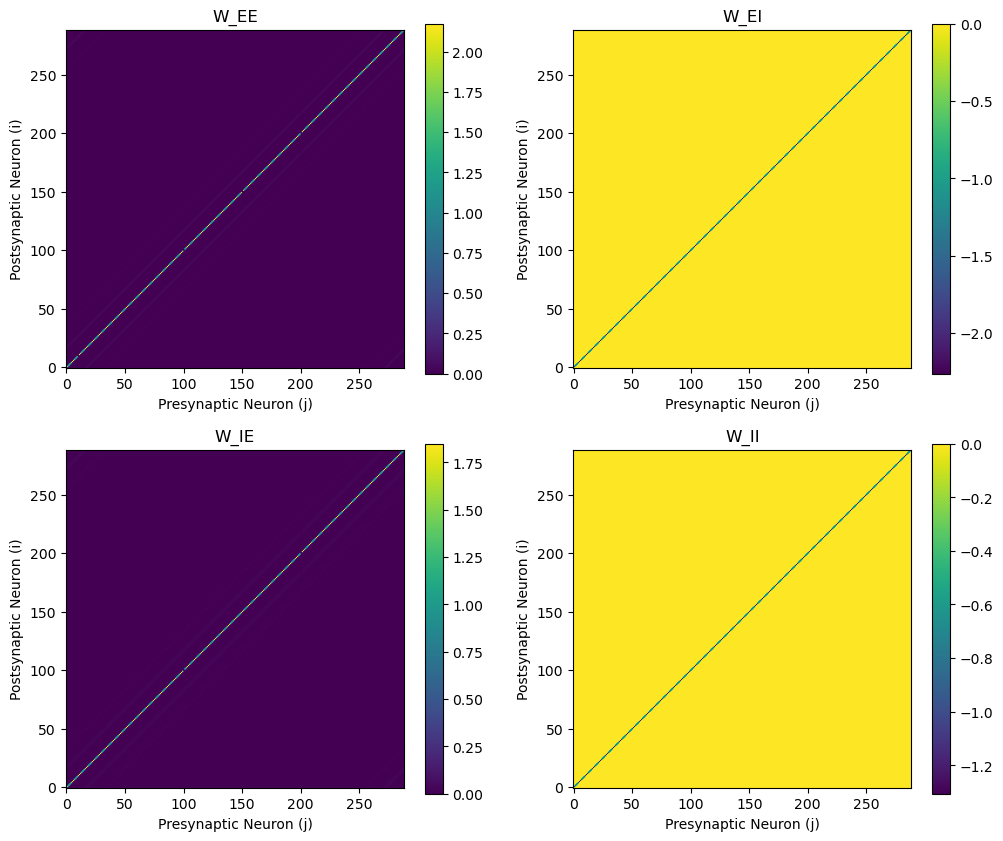

In [94]:
Ne = grid_pars.gridsize_Nx**2
W_EE = W[:Ne, :Ne]
W_EI = W[:Ne, Ne:] 
W_IE = W[Ne:, :Ne]
W_II = W[Ne:, Ne:]

fig, axs = plt.subplots(2, 2, figsize=(12,10))

p1 = axs[0,0].imshow(W_EE, cmap='viridis')
axs[0,0].set_title('W_EE')
fig.colorbar(p1, ax=axs[0,0])
axs[0,0].set_xlabel('Presynaptic Neuron (j)')
axs[0,0].set_ylabel('Postsynaptic Neuron (i)')
axs[0,0].invert_yaxis()

p2 = axs[0,1].imshow(W_EI, cmap='viridis') 
axs[0,1].set_title('W_EI')
fig.colorbar(p2, ax=axs[0,1])
axs[0,1].set_xlabel('Presynaptic Neuron (j)')
axs[0,1].set_ylabel('Postsynaptic Neuron (i)')
axs[0,1].invert_yaxis()

p3 = axs[1,0].imshow(W_IE, cmap='viridis')
axs[1,0].set_title('W_IE')
fig.colorbar(p3, ax=axs[1,0])
axs[1,0].set_xlabel('Presynaptic Neuron (j)')
axs[1,0].set_ylabel('Postsynaptic Neuron (i)')
axs[1,0].invert_yaxis()

p4 = axs[1,1].imshow(W_II, cmap='viridis')
axs[1,1].set_title('W_II') 
fig.colorbar(p4, ax=axs[1,1])
axs[1,1].set_xlabel('Presynaptic Neuron (j)')
axs[1,1].set_ylabel('Postsynaptic Neuron (i)')
axs[1,1].invert_yaxis()


tensor(7)


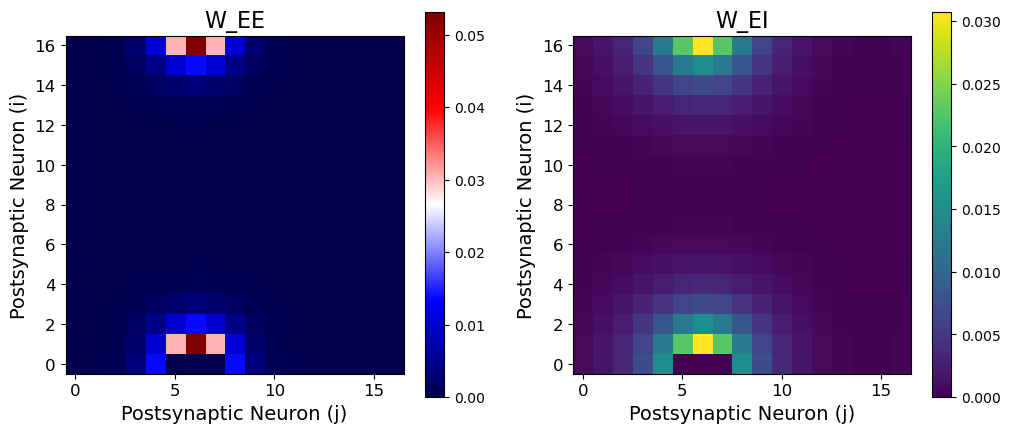

In [115]:
# Get total number of neurons
Ne = grid_pars.gridsize_Nx**2 

# Select a presynaptic neuron index
pre_syn_idx = 6

# Get the weight vector for that neuron
pre_syn_weights = W[:, pre_syn_idx]

# Split into components
W_EE = pre_syn_weights[:Ne]  
W_EI = pre_syn_weights[Ne:]

# Find index of maximum value 
max_idx = W_EE.argmax()
print(max_idx)
max_idx2 = W_EI.argmax()

# Set maximum value to 0
W_EE[max_idx] = 0
W_EI[max_idx2] = 0

# Reshape and plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
im1 = ax1.imshow(W_EE.reshape(grid_pars.gridsize_Nx, grid_pars.gridsize_Nx), 
                 cmap='seismic')
ax1.set_title('W_EE', fontsize=16)
ax1.set_xlabel('Postsynaptic Neuron (j)', fontsize=14)
ax1.set_ylabel('Postsynaptic Neuron (i)', fontsize=14)
ax1.invert_yaxis()
fig.colorbar(im1, ax=ax1)

im2 = ax2.imshow(W_EI.reshape(grid_pars.gridsize_Nx, grid_pars.gridsize_Nx), cmap='viridis')  
ax2.set_title('W_EI', fontsize=16)
ax2.set_xlabel('Postsynaptic Neuron (j)', fontsize=14)
ax2.set_ylabel('Postsynaptic Neuron (i)', fontsize=14)

ax2.invert_yaxis()
fig.colorbar(im2, ax=ax2)

# Optionally, increase tick label size
ax1.tick_params(axis='both', which='major', labelsize=12)
ax2.tick_params(axis='both', which='major', labelsize=12)

plt.show()

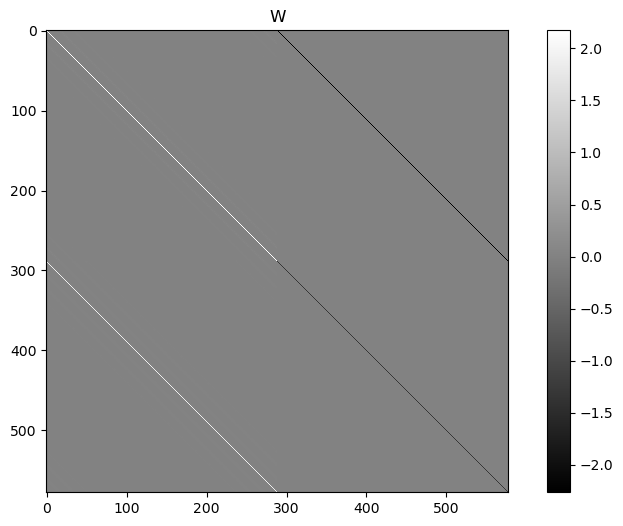

In [25]:
plt.imshow(W_np, cmap='gray', interpolation='nearest')
plt.title('W')
plt.colorbar()
plt.show()

ORI_vec:  tensor([22.3370, 22.3132, 22.2887, 22.2633, 22.2372, 22.2103, 22.1827, 22.1543,
        22.1251, 22.0952, 22.0646, 22.0332, 22.0012, 21.9684, 21.9349, 21.9007,
        21.8659, 22.4363, 22.4124, 22.3877, 22.3622, 22.3360, 22.3089, 22.2812,
        22.2526, 22.2233, 22.1933, 22.1625, 22.1310, 22.0987, 22.0658, 22.0321,
        21.9977, 21.9627, 22.5361, 22.5121, 22.4873, 22.4617, 22.4353, 22.4082,
        22.3802, 22.3515, 22.3221, 22.2919, 22.2609, 22.2292, 22.1968, 22.1637,
        22.1298, 22.0953, 22.0600, 22.6367, 22.6125, 22.5876, 22.5619, 22.5353,
        22.5080, 22.4799, 22.4511, 22.4215, 22.3911, 22.3600, 22.3281, 22.2955,
        22.2622, 22.2281, 22.1934, 22.1579, 22.7379, 22.7136, 22.6885, 22.6627,
        22.6360, 22.6085, 22.5803, 22.5512, 22.5214, 22.4909, 22.4596, 22.4275,
        22.3947, 22.3612, 22.3270, 22.2920, 22.2564, 22.8397, 22.8153, 22.7901,
        22.7641, 22.7373, 22.7096, 22.6812, 22.6520, 22.6220, 22.5913, 22.5598,
        22.5276, 22.4946, 22.4

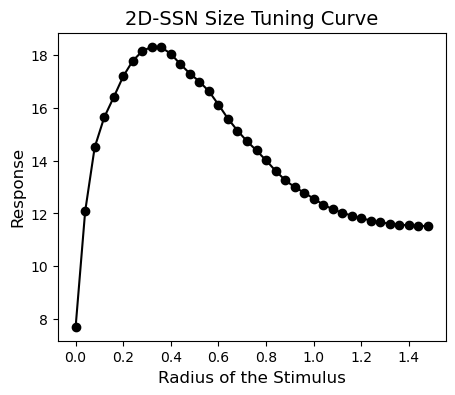

In [46]:
# Define the grid size and identify the central neuron
central_neuron_idx = ssn_2d_topo.center_inds[0]

# Define different sizes for the grating stimuli
sizes = torch.arange(0, 1.51, 0.04) 
responses = []

for size in sizes:
    # Generate grating stimulus for each size
    inp_vec_grating = ssn_2d_topo.make_grating_input(size.item(), ori_s=orientation, contrast=contrast,**input_pars)

    # Compute the fixed point response
    r_fp_grating, _ = ssn_2d_topo.fixed_point_r(inp_vec_grating,verbose=False)

    # Extract the response of the central neuron
    central_neuron_response = r_fp_grating[central_neuron_idx]
    responses.append(central_neuron_response)

responses = torch.tensor(responses)  # Convert list to tensor
#responses /= torch.mean(responses)

#plot without normalisation 


# Plot the size tuning curve
plt.figure(figsize=(5, 4))
plt.plot(sizes.numpy(), responses.numpy(), marker='o', linestyle='-', color='black', markersize=6)  # Convert tensors to NumPy arrays for plotting
plt.xlabel('Radius of the Stimulus', fontsize=12)
plt.ylabel('Response', fontsize=12)
plt.title('2D-SSN Size Tuning Curve', fontsize=14)
# Grid and ticks format
plt.show()

# NUMPY tests

In [8]:
from SSN_numpy import _SSN_Base, SSN2DTopoV1, Euler2fixedpt


In [9]:
# Connection parameters for NumPy
conn_pars_numpy = {
    'J_2x2': np.array([[1.124, -0.931], [1.049, -0.537]]) *np.pi * psi.numpy(), 
    's_2x2': np.array([[0.2955, 0.09], [0.5542, 0.09]]),  
    'p_local': [0.72,0.7],
    'sigma_oris': 45
}

In [10]:
ssn_numpy = SSN2DTopoV1(n=n, k=k, tauE=tauE, tauI=tauI, grid_pars=grid_pars,  conn_pars=conn_pars_numpy)

ORI_vec:  [31.99783119 31.9637132  31.92965137 31.89564539 31.86169499 31.82779986
 31.79395972 31.76017429 31.72644327 31.6927664  31.65914339 31.62557398
 31.59205788 31.55859484 31.52518459 31.49182686 31.4585214  31.94831038
 31.91418771 31.8801211  31.84611024 31.81215484 31.77825461 31.74440926
 31.7106185  31.67688205 31.64319963 31.60957097 31.57599579 31.54247382
 31.50900479 31.47558844 31.4422245  31.40891272 31.8990576  31.86493011
 31.83085857 31.79684267 31.76288212 31.72897663 31.69512591 31.66132967
 31.62758764 31.59389953 31.56026506 31.52668397 31.49315597 31.45968081
 31.42625822 31.39288792 31.35956967 31.85007125 31.81593877 31.78186214
 31.74784104 31.71387518 31.67996428 31.64610804 31.61230618 31.57855841
 31.54486445 31.51122403 31.47763688 31.44410271 31.41062127 31.37719228
 31.34381549 31.31049063 31.80134969 31.76721207 31.73313019 31.69910374
 31.66513242 31.63121595 31.59735404 31.5635464  31.52979274 31.49609279
 31.46244627 31.4288529  31.39531241 31.3

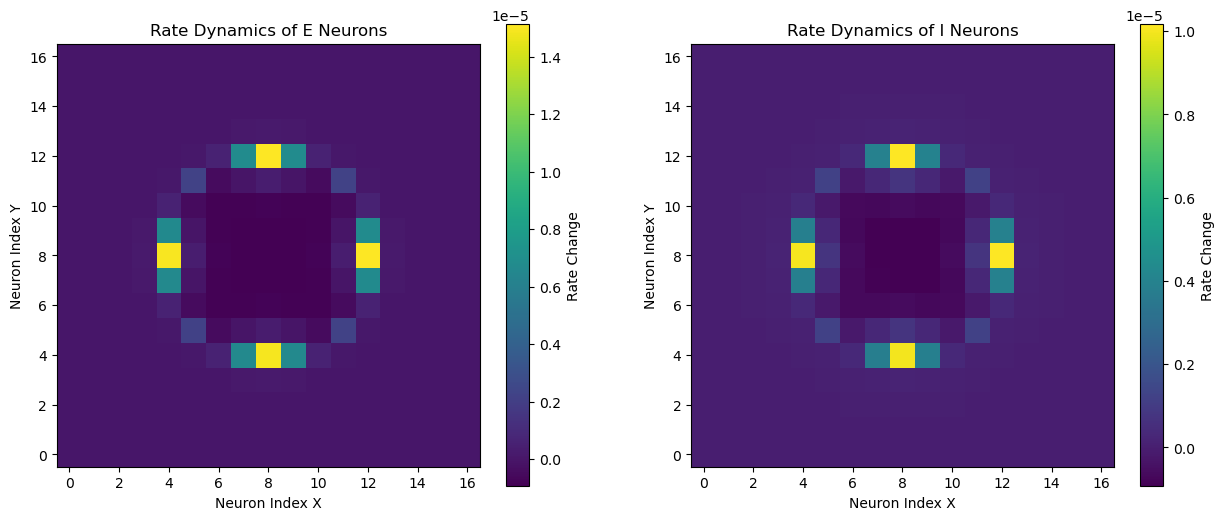

In [11]:
# Creating the same stimulus as in PyTorch
inp_vec_grating_numpy = ssn_numpy.make_grating_input(radius, ori_s=orientation, contrast=contrast,**input_pars)

# Find the network's fixed point response to the grating stimulus (NumPy)
r_fp_grating_numpy, CONVG_grating_numpy = ssn_numpy.fixed_point_r(inp_vec_grating_numpy)

# Rate dynamics analysis (NumPy)
r_dyn_numpy = ssn_numpy.drdt(r_fp_grating_numpy, inp_vec_grating_numpy)

# Use the vec2map method to convert the rate dynamics into 2D maps for E and I neurons
E_map_numpy, I_map_numpy = ssn_numpy.vec2map(r_dyn_numpy)

# Plot for E neurons
plt.figure(figsize=(15, 6))

plt.subplot(1,2,1)
plt.imshow(E_map_numpy, cmap='viridis')
cbar = plt.colorbar()
cbar.set_label('Rate Change')
plt.title("Rate Dynamics of E Neurons")
plt.xlabel("Neuron Index X")
plt.ylabel("Neuron Index Y")
plt.gca().invert_yaxis()

# Plot for I neurons
plt.subplot(1,2,2)
plt.imshow(I_map_numpy, cmap='viridis')
cbar = plt.colorbar()
cbar.set_label('Rate Change')
plt.title("Rate Dynamics of I Neurons")
plt.xlabel("Neuron Index X")
plt.ylabel("Neuron Index Y")
plt.gca().invert_yaxis()
plt.show()

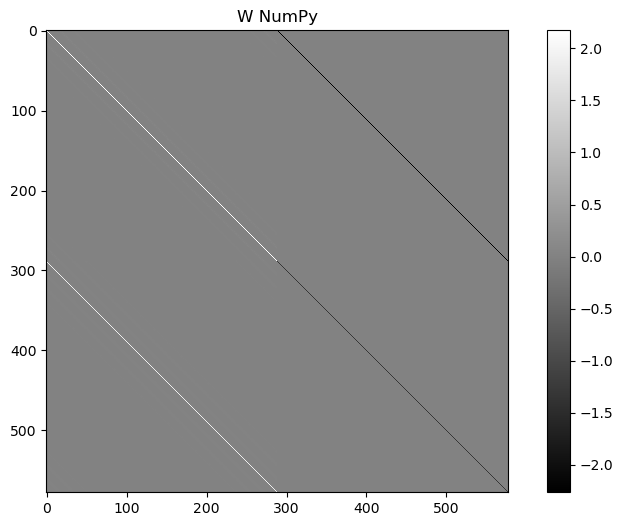

In [12]:
W_numpy = ssn_numpy.make_W(**conn_pars_numpy)
plt.imshow(W_numpy, cmap='gray', interpolation='nearest')
plt.title('W NumPy')
plt.colorbar()

ORI_vec:  [31.99783119 31.9637132  31.92965137 31.89564539 31.86169499 31.82779986
 31.79395972 31.76017429 31.72644327 31.6927664  31.65914339 31.62557398
 31.59205788 31.55859484 31.52518459 31.49182686 31.4585214  31.94831038
 31.91418771 31.8801211  31.84611024 31.81215484 31.77825461 31.74440926
 31.7106185  31.67688205 31.64319963 31.60957097 31.57599579 31.54247382
 31.50900479 31.47558844 31.4422245  31.40891272 31.8990576  31.86493011
 31.83085857 31.79684267 31.76288212 31.72897663 31.69512591 31.66132967
 31.62758764 31.59389953 31.56026506 31.52668397 31.49315597 31.45968081
 31.42625822 31.39288792 31.35956967 31.85007125 31.81593877 31.78186214
 31.74784104 31.71387518 31.67996428 31.64610804 31.61230618 31.57855841
 31.54486445 31.51122403 31.47763688 31.44410271 31.41062127 31.37719228
 31.34381549 31.31049063 31.80134969 31.76721207 31.73313019 31.69910374
 31.66513242 31.63121595 31.59735404 31.5635464  31.52979274 31.49609279
 31.46244627 31.4288529  31.39531241 31.3

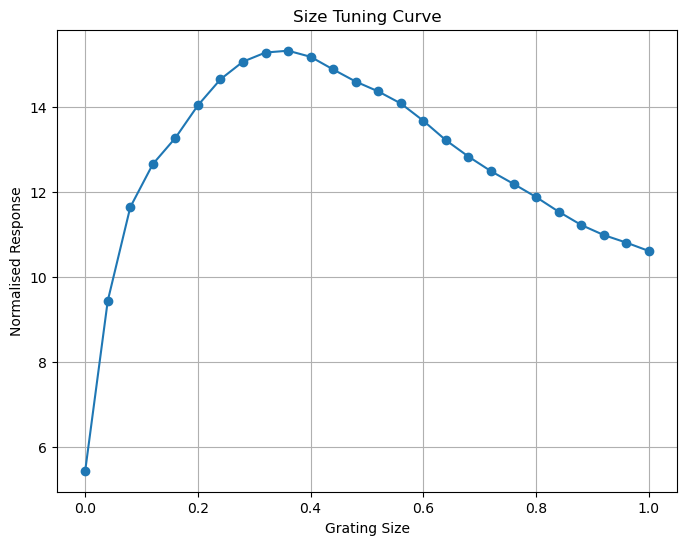

In [13]:
# identify the central neuron
central_neuron_idx = ssn_numpy.center_inds[0]

# Define different sizes for the grating stimuli
sizes = np.arange(0, 1.01, 0.04)
responses_np = []

for size in sizes:
    # Generate grating stimulus for each size
    inp_vec_grating = ssn_numpy.make_grating_input(size, ori_s=orientation, contrast=contrast,**input_pars)

    # Compute the fixed point response
    r_fp_grating, _ = ssn_numpy.fixed_point_r(inp_vec_grating, verbose=False)

    # Extract the response of the central neuron
    central_neuron_response = r_fp_grating[central_neuron_idx]
    responses_np.append(central_neuron_response)

responses_np = np.array(responses_np) 
#responses_np /= np.mean(responses_np)

# Plot the size tuning curve
plt.figure(figsize=(8, 6))
plt.plot(sizes, responses_np, marker='o')
plt.xlabel('Grating Size')
plt.ylabel('Normalised Response')
plt.title('Size Tuning Curve')
plt.grid(True)
plt.show()


# COMPARISON

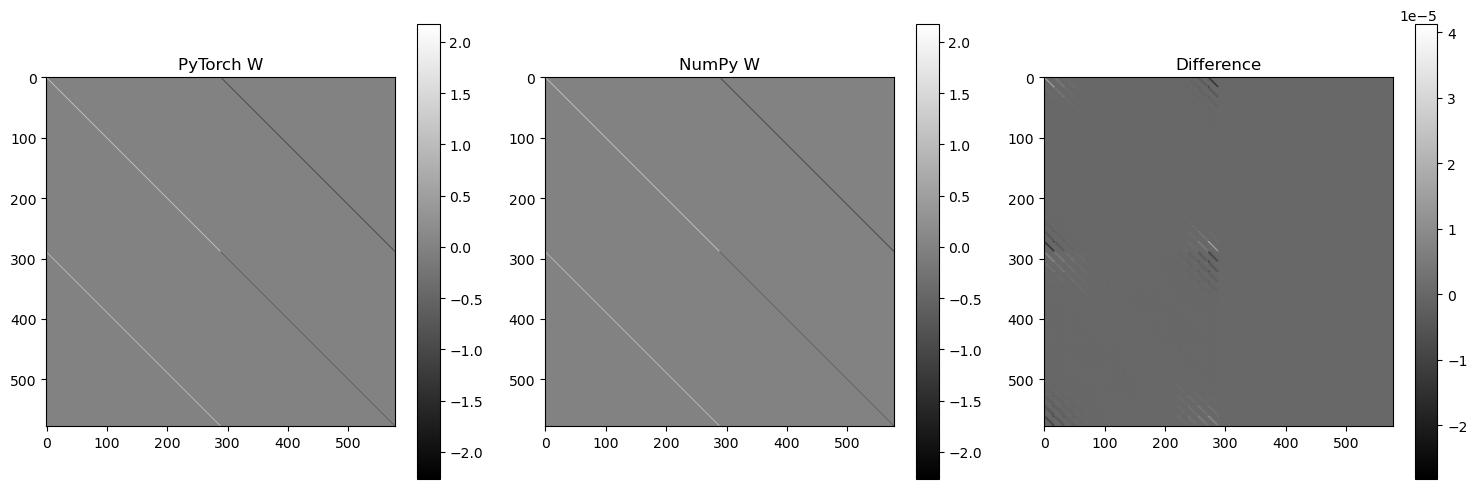

In [14]:
# Compute the difference
difference = W_np - W_numpy

# Plot the matrices
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(W_np, cmap='gray')
plt.title('PyTorch W')
plt.colorbar()

plt.subplot(1, 3, 2)
plt.imshow(W_numpy, cmap='gray')
plt.title('NumPy W')
plt.colorbar()

plt.subplot(1, 3, 3)
plt.imshow(difference, cmap='gray')
plt.title('Difference')
plt.colorbar()

plt.tight_layout()
plt.show()

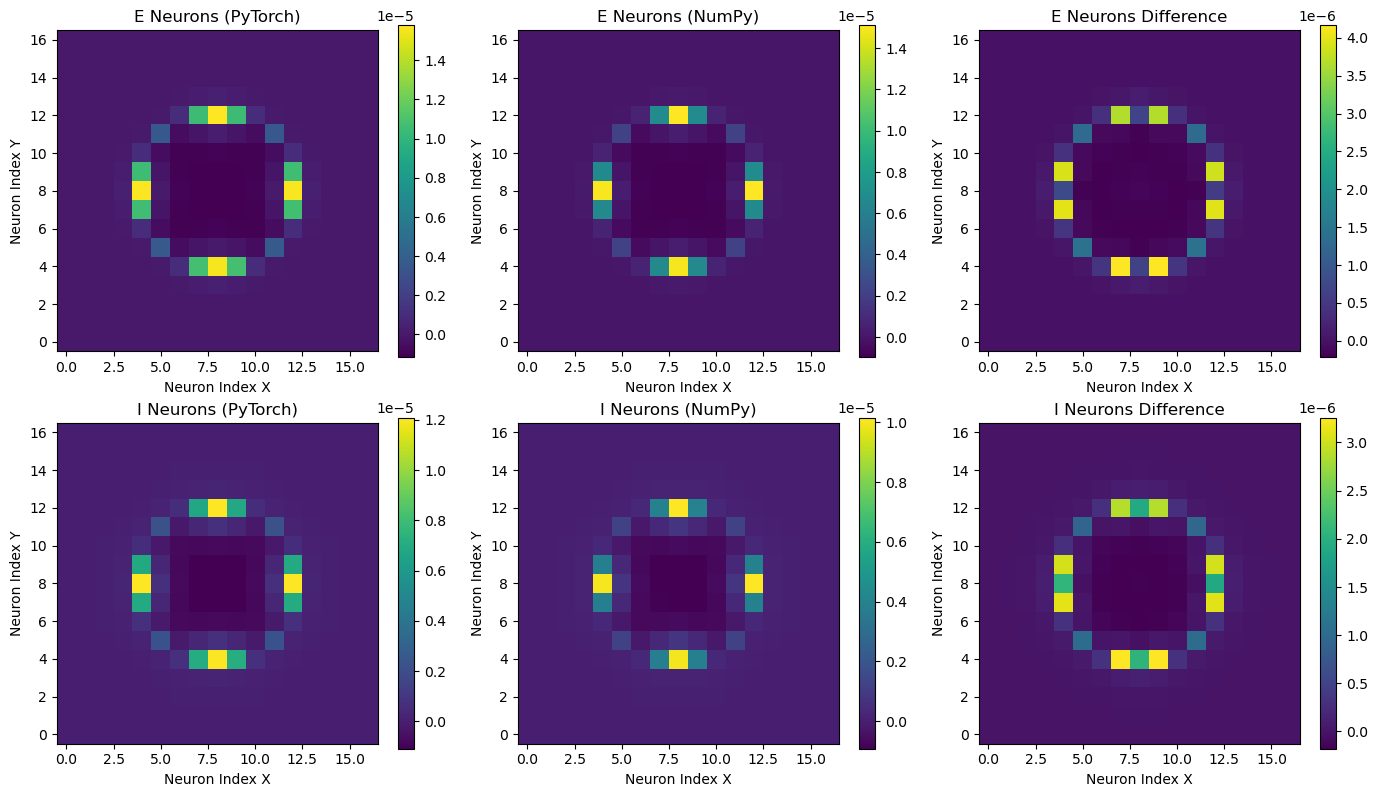

In [15]:
# Calculate differences
E_diff = E_map - E_map_numpy
I_diff = I_map - I_map_numpy

# Function to plot a map
def plot_map(data, title, ax, add_colorbar=False):
    im = ax.imshow(data, cmap='viridis')
    ax.set_title(title)
    ax.set_xlabel("Neuron Index X")
    ax.set_ylabel("Neuron Index Y")
    ax.invert_yaxis()
    if add_colorbar:
        plt.colorbar(im, ax=ax)
    return im

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 8))

# E neurons
plot_map(E_map, "E Neurons (PyTorch)", axes[0, 0], add_colorbar=True)
plot_map(E_map_numpy, "E Neurons (NumPy)", axes[0, 1], add_colorbar=True)
plot_map(E_diff, "E Neurons Difference", axes[0, 2], add_colorbar=True)

# I neurons
plot_map(I_map, "I Neurons (PyTorch)", axes[1, 0], add_colorbar=True)
plot_map(I_map_numpy, "I Neurons (NumPy)", axes[1, 1], add_colorbar=True)
plot_map(I_diff, "I Neurons Difference", axes[1, 2], add_colorbar=True)

plt.tight_layout()
plt.show()

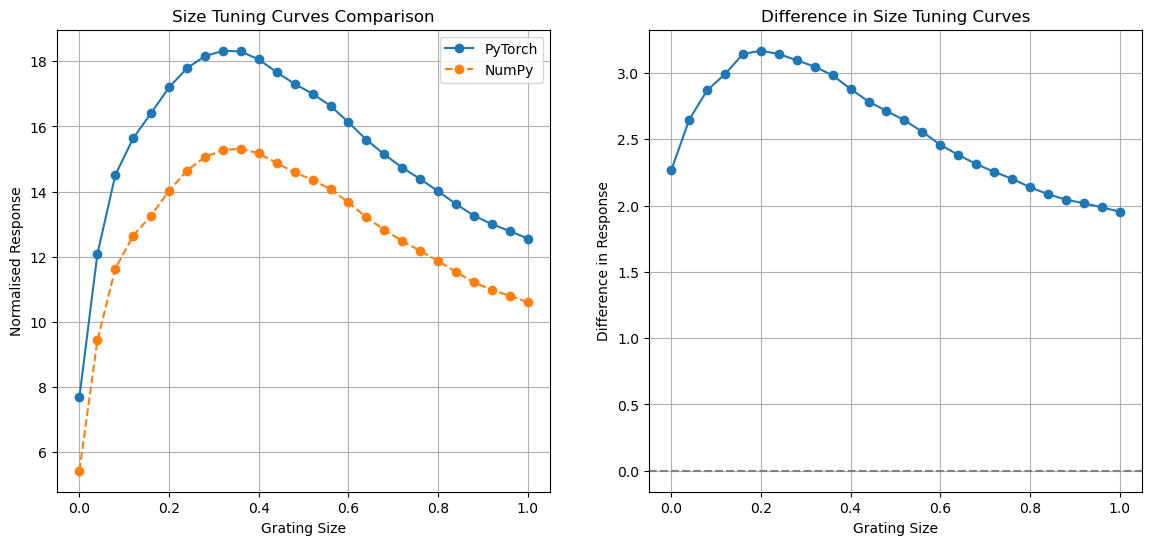

In [16]:
plt.figure(figsize=(14, 6))

# Plotting both PyTorch-based and NumPy-based size tuning curves on the same plot
plt.subplot(1, 2, 1)
plt.plot(sizes, responses.numpy(), marker='o', label='PyTorch')
plt.plot(sizes, responses_np, marker='o', label='NumPy', linestyle='--')
plt.xlabel('Grating Size')
plt.ylabel('Normalised Response')
plt.title('Size Tuning Curves Comparison')
plt.grid(True)
plt.legend()

# Plotting the difference between the curves
plt.subplot(1, 2, 2)
plt.plot(sizes, responses.numpy() - responses_np, marker='o')
plt.xlabel('Grating Size')
plt.ylabel('Difference in Response')
plt.title('Difference in Size Tuning Curves')
plt.grid(True)
plt.axhline(0, color='grey', linestyle='--')  # Zero line for reference

In [17]:
inp_vec_grating_numpy - inp_vec_grating

array([-2.83866583e-13, -8.66791302e-12, -2.02637723e-10, -3.43775491e-09,
       -3.98220848e-08, -2.94953154e-07, -1.30875319e-06, -3.28672207e-06,
       -4.49167209e-06, -3.29359353e-06, -1.31423129e-06, -2.96807009e-07,
       -4.01561616e-08, -3.47384354e-09, -2.05193142e-10, -8.79557757e-12,
       -2.88649924e-13, -8.67208048e-12, -3.35099381e-10, -1.00491236e-08,
       -2.20222777e-07, -3.28142310e-06, -3.06229934e-05, -1.64203726e-04,
       -4.67474394e-04, -6.67616699e-04, -4.68450361e-04, -1.64890077e-04,
       -3.08151965e-05, -3.30891304e-06, -2.22531363e-07, -1.01756723e-08,
       -3.40027903e-10, -8.81800460e-12, -2.02831030e-10, -1.00538762e-08,
       -3.95572197e-07, -1.15743631e-05, -2.31728663e-04, -2.86674219e-03,
       -1.95178975e-02, -6.52495674e-02, -9.85732342e-02, -6.53856024e-02,
       -1.95993663e-02, -2.88471002e-03, -2.33667249e-04, -1.16955273e-05,
       -4.00546680e-07, -1.02015381e-08, -2.06239264e-10, -3.44263495e-09,
       -2.20429416e-07, -

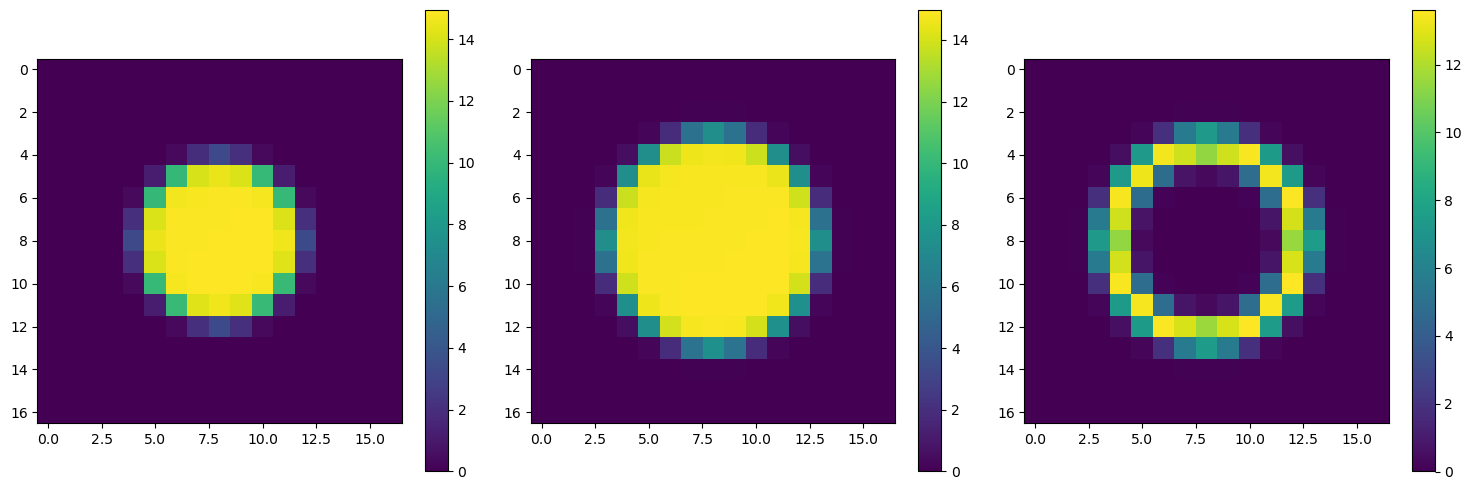

In [19]:
plt.figure(figsize=(15, 5))

# Use the vec2map method to convert the rate dynamics into 2D maps for E and I neurons
E_map_numpy2, I_map_numpy2 = ssn_numpy.vec2map(inp_vec_grating_numpy)

plt.subplot(1, 3, 1)
plt.imshow(E_map_numpy2, cmap='viridis',interpolation='nearest')
plt.colorbar()

# Use the vec2map method to convert the rate dynamics into 2D maps for E and I neurons
E_map2, I_map2 = ssn_2d_topo.vec2map(inp_vec_grating)

plt.subplot(1, 3, 2)
plt.imshow(E_map2, cmap='viridis',interpolation='nearest')
plt.colorbar()

plt.subplot(1, 3, 3)
plt.imshow(E_map2 - E_map_numpy2,cmap='viridis')
plt.colorbar()

plt.tight_layout()
plt.show()